In [2]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
#from matplotlib.finance import date2num
import time
import seaborn as sns

from config import consumer_key, consumer_secret, access_token, access_token_secret

In [3]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [5]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [6]:
# Loop through all tweets

twf = pd.DataFrame()
twf.tz_localize('UTC').tz_convert('US/Pacific')
counter = 0
# Create list of Twitter handles
target_terms= ["@BBC", "@CBS" ,"@CNN", "@FoxNews" , "@nytimes"]

for x in target_terms:    
    #print("---------->>>>>>>",x)  
    public_tweets = api.search(x, count=100, result_type="recent")
    #print(public_tweets)
    
    for tweet in public_tweets["statuses"]:
        #print(tweet["text"])
        #Run Vader Analysis on each tweet
        #datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        #print("done")
       # print(tweet["created_at"])
       # print(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y").strftime('%m/%d/%Y %H:%M:%S'))
        twf.loc[counter,'Handle'] = x
        twf.loc[counter,'Date'] = tweet["created_at"]
        twf.loc[counter,'Text'] = tweet["text"]
        twf.loc[counter,'Compound_Score'] = compound
        twf.loc[counter,'Positive_score'] = pos
        twf.loc[counter,'Negative_score'] = neg
        twf.loc[counter,'Neutral_score'] = neu
        #print(datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y"))
        counter = counter+1  

        
twf.to_csv("Sentiment_analysis.csv")

#converts the datetime object from a string
twf["Date"]=pd.to_datetime(twf["Date"])

twf.head() 


,Handle,Date,Text,Compound_Score,Positive_score,Negative_score,Neutral_score
0,@BBC,2018-04-04 00:32:01,"RT @ProfElvanAktas: “Kanlı Tiyatro""\n""Deadly T...",0.0000,0.000,0.000,1.000
1,@BBC,2018-04-04 00:30:22,RT @RussiaConnects: #Skripal #Skripals\n\n@Bor...,0.0000,0.000,0.000,1.000
2,@BBC,2018-04-04 00:29:59,@alexnunns @BBCNews Its over @bbc is finished.,0.0000,0.000,0.000,1.000
3,@BBC,2018-04-04 00:28:54,"RT @BBC: 8-year-old Alexa is going blind, so s...",-0.1082,0.095,0.113,0.792
4,@BBC,2018-04-04 00:28:46,RT @RussiaConnects: #Skripal #Skripals\n\n@Bor...,0.0000,0.000,0.000,1.000


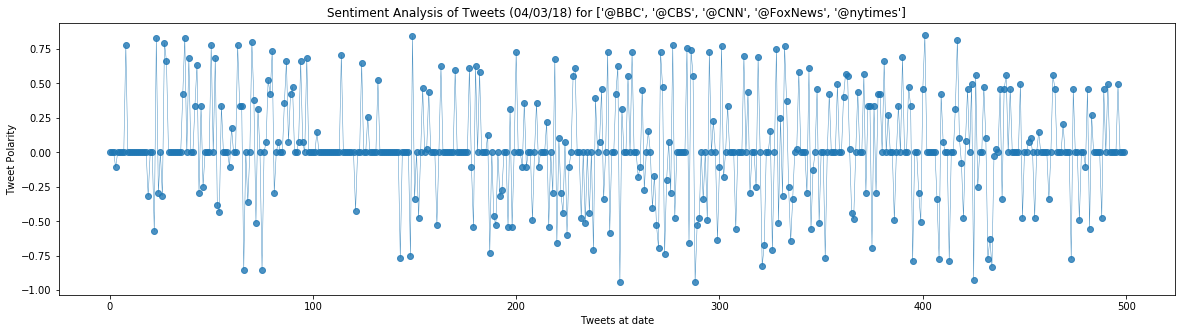

In [7]:
# Create plot
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(twf["Compound_Score"])),
        twf["Compound_Score"], marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_terms))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets at date")
plt.show()

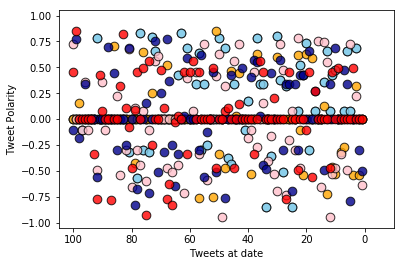

In [8]:
# Create plot
plt.scatter(np.arange(-len(twf[twf["Handle"] == "@BBC"]), 0, 1), 
  twf[twf["Handle"] == "@BBC"]["Compound_Score"],
  edgecolor="black", linewidths=1, marker="o", color="skyblue", s=75,
  alpha=0.8, label="BBC")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets at date")
plt.xlim([-105, 10])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])

plt.scatter(np.arange(-len(twf[twf["Handle"] == "@BBC"]), 0, 1), 
  twf[twf["Handle"] == "@BBC"]["Compound_Score"],
  edgecolor="black", linewidths=1, marker="o", color="skyblue", s=75,
  alpha=0.8, label="BBC")

plt.scatter(np.arange(-len(twf[twf["Handle"] == "@CBS"]), 0, 1), 
  twf[twf["Handle"] == "@CBS"]["Compound_Score"],
  edgecolor="black", linewidths=1, marker="o", color="orange", s=75,
  alpha=0.8, label="@CBS")

plt.scatter(np.arange(-len(twf[twf["Handle"] == "@CNN"]), 0, 1), 
  twf[twf["Handle"] == "@CNN"]["Compound_Score"],
  edgecolor="black", linewidths=1, marker="o", color="pink", s=75,
  alpha=0.8, label="@CNN")

plt.scatter(np.arange(-len(twf[twf["Handle"] == "@FoxNews"]), 0, 1), 
  twf[twf["Handle"] == "@FoxNews"]["Compound_Score"],
  edgecolor="black", linewidths=1, marker="o", color="darkblue", s=75,
  alpha=0.8, label="@FoxNews")


plt.scatter(np.arange(-len(twf[twf["Handle"] == "@nytimes"]), 0, 1), 
  twf[twf["Handle"] == "@nytimes"]["Compound_Score"],
  edgecolor="black", linewidths=1, marker="o", color="red", s=75,
  alpha=0.8, label="@nytimes")



plt.show()

In [9]:
twf.groupby("Handle").mean()




,Compound_Score,Positive_score,Negative_score,Neutral_score
Handle,,,,
@BBC,0.106580,0.07022,0.02722,0.90257
@CBS,0.002427,0.03537,0.03363,0.93101
@CNN,-0.021903,0.09271,0.09301,0.81428
@FoxNews,0.028483,0.07506,0.06677,0.85817
@nytimes,0.019534,0.04797,0.05491,0.89711


In [10]:
%matplotlib inline


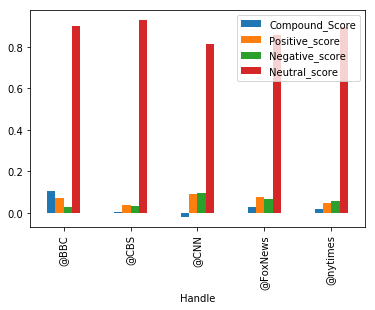

In [11]:
twf.groupby("Handle").mean().plot(kind='bar')


In [18]:
newtwf=twf.drop(twf.columns[[1,2, 4 , 5,6]], axis=1)


,Handle,Compound_Score
0,@BBC,0.0000
1,@BBC,0.0000
2,@BBC,0.0000
3,@BBC,-0.1082
4,@BBC,0.0000


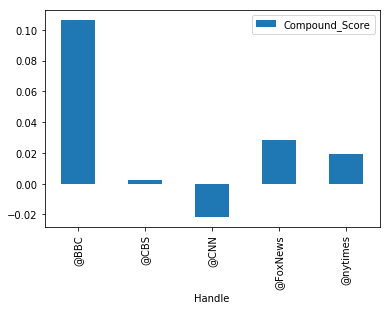

In [19]:
newtwf.groupby("Handle").mean().plot(kind='bar')
newtwf.head()

In [21]:
twf.tail()


,Handle,Date,Text,Compound_Score,Positive_score,Negative_score,Neutral_score
480,@nytimes,59,"RT @amyep9: Also, @nytimes labeled this photo ...",0.0000,0.000,0.0,1.000
481,@nytimes,56,Great response to (yet another) whack @nytimes...,0.6249,0.272,0.0,0.728
482,@nytimes,53,@lettieri_mike @thecjpearson @cmg_48 @foxandfr...,0.0000,0.000,0.0,1.000
483,@nytimes,48,RT @nytimes: Pope Celebrates Easter Mass With ...,0.8020,0.340,0.0,0.660
484,@nytimes,44,How Memphis Gave Up on Dr. King’s Dream via ...,0.2500,0.167,0.0,0.833
